<font size=7>LFP Animations

## <font color="grey"> Imports

In [1]:
# Basic Imports
import numpy as np
import matplotlib.pyplot as plt

# Ash's animation imports
from matplotlib.animation import FuncAnimation
from matplotlib import cm
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
import scipy.interpolate
import math

# My imports
import pickle
from human_hip.lfp import butter_filter, get_brain_waves
from human_hip.spike_data import raster_fancy_plot, read_phy_files
import  braingeneers.data.datasets_electrophysiology as ephys

## <font color="blue"> Look at raster data

In [2]:
sd = read_phy_files('/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/derived/kilosort2/hc3.28_hckcr1_chip16835_plated34.2_rec4.2_curated.zip')


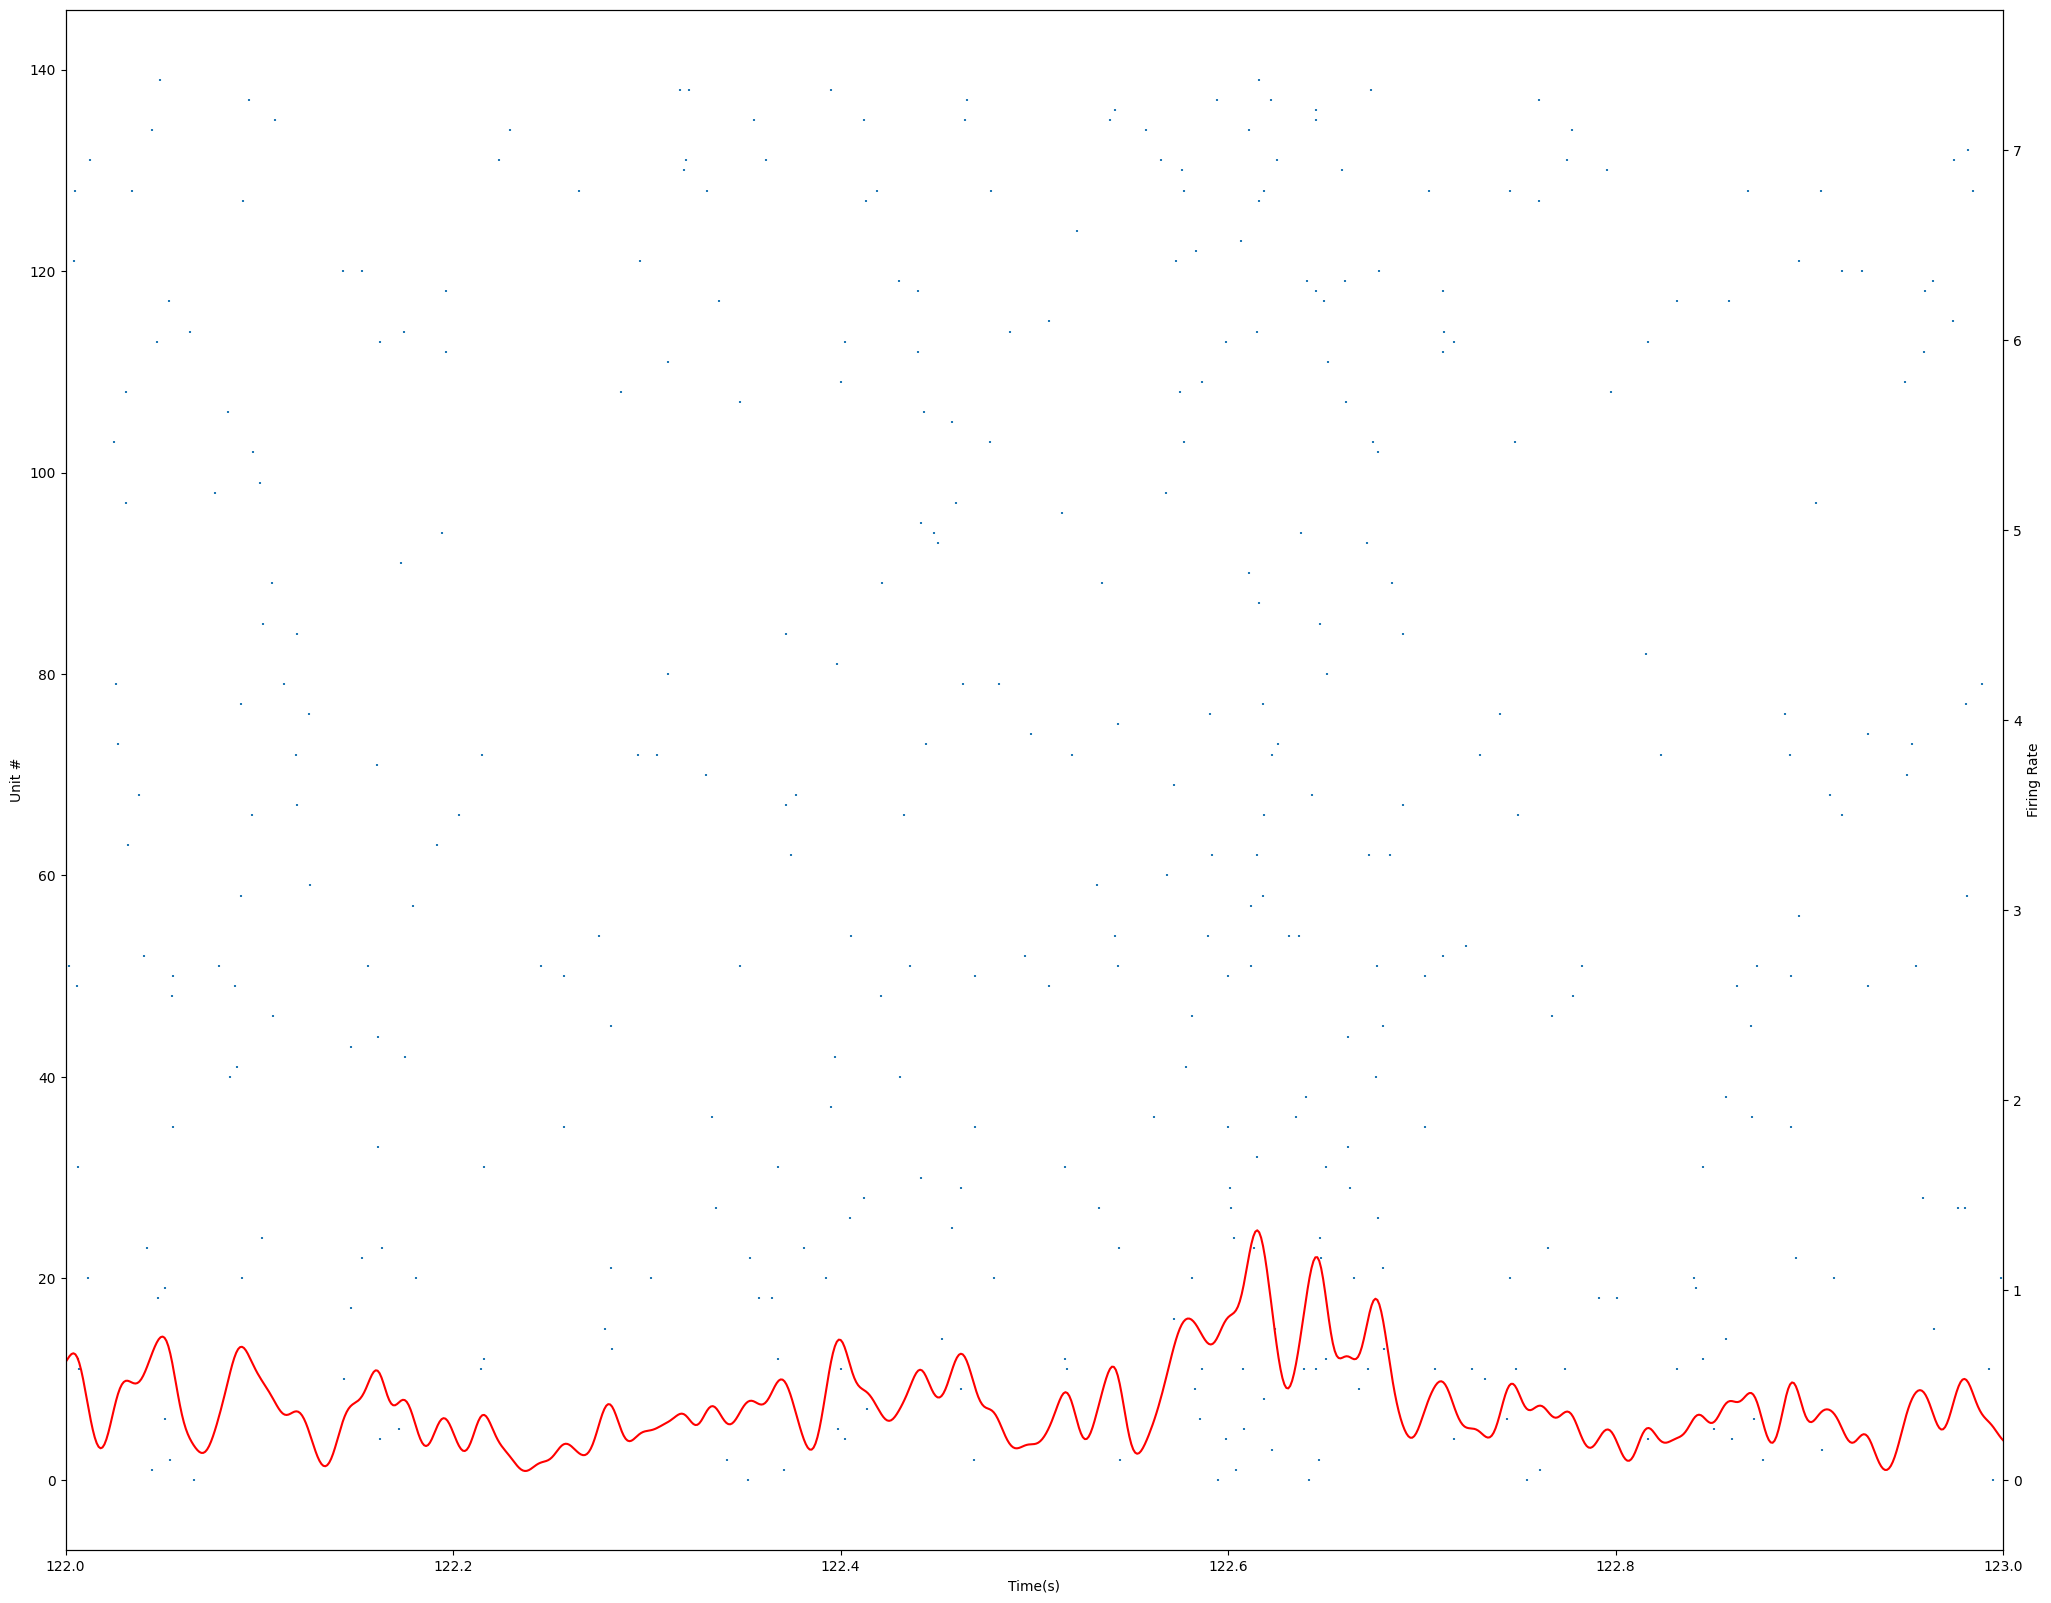

In [4]:
raster_fancy_plot(sd, xsize=25, ysize=20, start_time=122, stop_time=123)

## <font color="blue"> Get Data

load data

In [4]:
# load raw data
file = open("/workspaces/human_hippocampus/data/ephys_raw/2023-04-02-e-hc328_unperturbed/raw_start120s_stop130s_fs1ms.pkl", 'rb')
data_pkl = pickle.load(file)
file.close()

process data

In [5]:
x = data_pkl['xy'][:,0]                                             # x and y  coordinates
y = data_pkl['xy'][:,1]
waves = get_brain_waves( data_pkl["data"], data_pkl["frame_rate"] ) # get common brain waves

basic plots

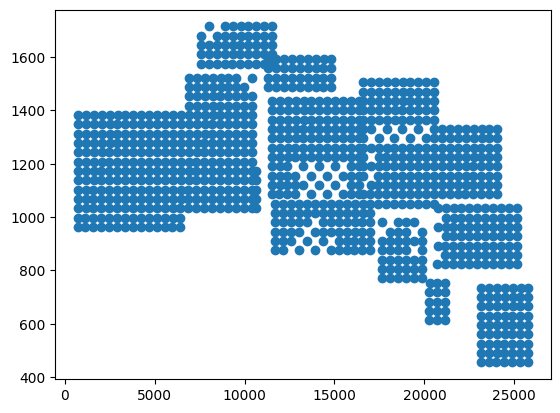

In [6]:
# plot electrode layout
plt.scatter( x , y )

## <font color="brown">Multi-Plots


### <font color="brown">Get Scatter

In [7]:
import random as rand

In [8]:
def plotFootprint( sd, neuron_id ):
    
    # Scatter plot of neurons
    plt.figure(figsize=(8, 8))
    neuron_x = []
    neuron_y = []
    for neuron in sd.neuron_data[0].values():
        neuron_x.append(neuron['position'][0])
        neuron_y.append(neuron['position'][1])
    plt.scatter(neuron_y, neuron_x, alpha=0.10, c='grey')
        
    # Plot neuron geographic location
    for neighbor in  sd.neuron_data[0][neuron_id]['neighbor_positions']:
        plt.scatter( [neighbor[1]+rand.random()*13], [neighbor[0]+rand.random()*10], alpha=0.40, c='blue')
    
    plt.xlabel('um')
    plt.ylabel('um')
    plt.title("Directionality plot")
    plt.show()

/tmp/ipykernel_1121/2159437574.py:7: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():
/tmp/ipykernel_1121/2159437574.py:13: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neighbor in  sd.neuron_data[0][neuron_id]['neighbor_positions']:


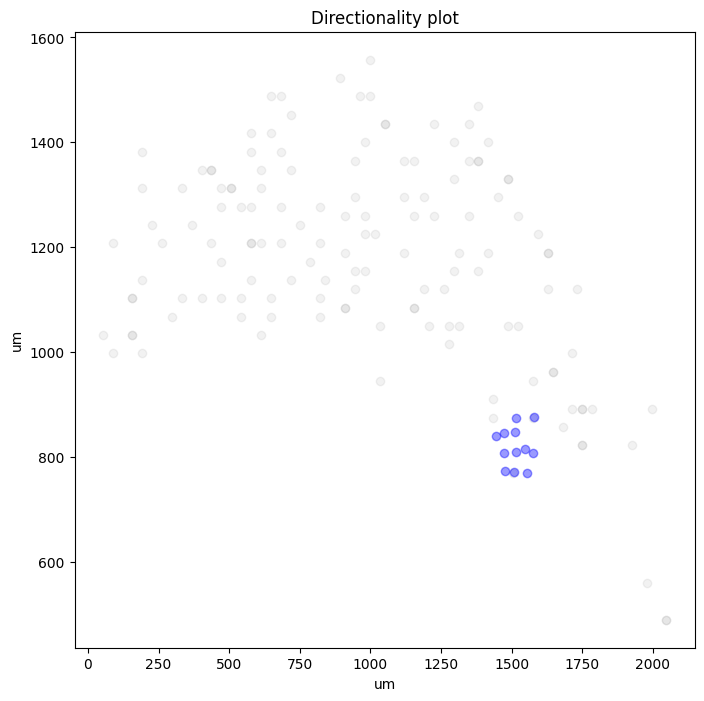

In [9]:
plotFootprint( sd, 0 )

### Create time sequence

In [101]:
# star and stop time
start_time = 2700 + 120 * 1000
end_time = 5000 + 120 * 1000

In [102]:
big_train= sd.train

In [103]:
# make smaller spike train of only spikes in time window
small_train = []
for i_train in big_train:
    small_train.append( i_train[ (i_train > start_time) & (i_train < end_time) ] )

In [109]:
# for a given time, i, find all neurons that fire within 50 ms of that time
#neuron_x = []
#neuron_y = []

neurons_by_time = []
for i in range(start_time, end_time):                                   # loop over time
    firing_neurons = []
    for i2 in range(len(small_train)):                                   # loop over neurons
        if len(small_train[i2]) > 0:                                     # if neuron fires at all
            if np.sum( np.abs( small_train[i2] - i ) < 25 ):             # if neuron fires within at least once within 50 ms of time i
                #neuron_x.append( sd.neuron_data[0][i2]['position'][0] )  # add neuron x/y locations to list
                #neuron_y.append( sd.neuron_data[0][i2]['position'][1] )
                firing_neurons.append( i2 )
    neurons_by_time.append( firing_neurons )

        


### helper functions

In [110]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])

/tmp/ipykernel_1121/3713121702.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


/tmp/ipykernel_1121/3131233516.py:8: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


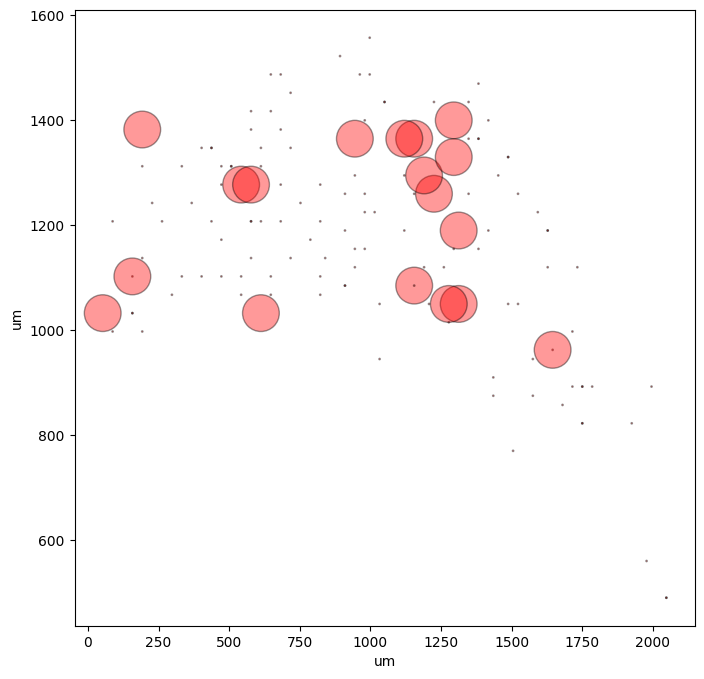

In [111]:
# Scatter plot of neurons
neuron_sizes=  np.ones(sd.N) 
neuron_sizes[ neuron_ids ] = 700

plt.figure(figsize=(8, 8))
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])
plt.scatter(neuron_y, neuron_x, c="red",  alpha=.4 , edgecolor='black', s=neuron_sizes )
    

plt.xlabel('um')
plt.ylabel('um')
plt.show()

### create multiplots

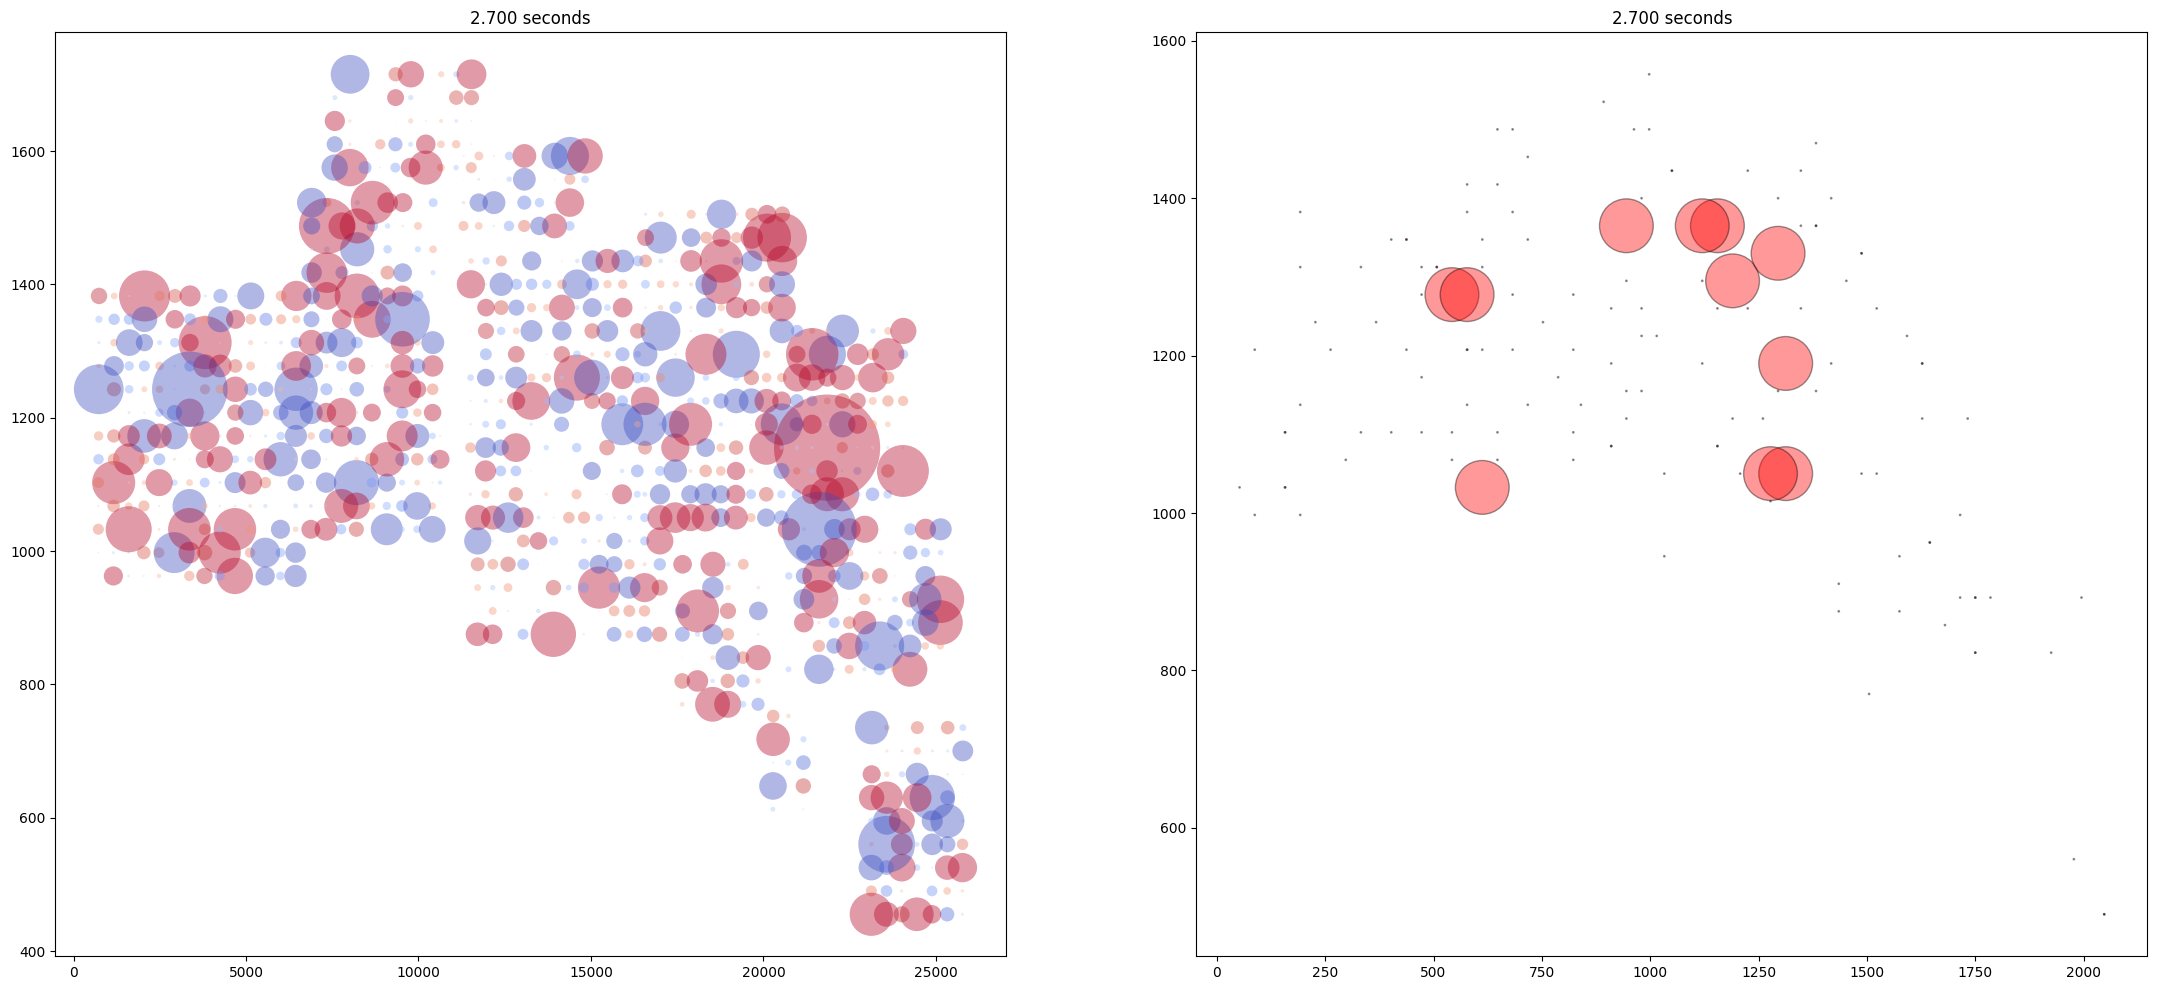

In [112]:
### Long Alpha Animation
# ca1_alpha_start2700_stop5700_step1
# First set up the figure, the axis, and the plot element we want to animate
fig, plots = plt.subplots(nrows=1,ncols=2,figsize=(27,12))
#ax = plt.axes()

# Waves plot
data = waves["alpha"] 
norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
plot0 = plots[0].scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, s=(np.abs(data[:,0])**1.8)*10 ,  alpha=.4 , edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,

# Footpring plot
plot1 = plots[1].scatter( neuron_y , neuron_x, c="red", s=np.ones(sd.N),  alpha=.4,  edgecolor='black' )

# animation function.  This is called sequentially
def animate(i):
    # Waves plot
    plot0.set_array(data[:,i])
    plot0._sizes = (np.abs(data[:,i])**2.3)*80
    plots[0].set_title(f"{i/1000:.3f} seconds")
    #plots[0].set_xlim(0,27000)
    #plots[0].set_ylim(400,1800)

    # Raster Plot
    neuron_sizes=  np.ones(sd.N) 
    neuron_sizes[ neurons_by_time[i-2700] ] = 1500
    plot1._sizes = neuron_sizes
    plots[1].set_title(f"{i/1000:.3f} seconds")
    #plots[1].set_xlim(0,27000)
    #plots[1].set_ylim(400,1800)
    return plots

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, frames=range(2700, 5000, 3), interval=100, blit=False)  #5700

In [108]:
anim.save("checkit6.mp4")

In [ ]:
len(range(2700, 3000, 1)) * 100/ 1000